In [1]:
import calendar
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
path = "../data/raw_total_fight_data.csv"
df_total_fight_data = pd.read_csv(filepath_or_buffer=path, sep=';')
df_total_fight_data.shape

(5144, 41)

In [4]:
df_total_fight_data.head()

,R_fighter,B_fighter,R_KD,B_KD,R_SIG_STR.,B_SIG_STR.,R_SIG_STR_pct,B_SIG_STR_pct,R_TOTAL_STR.,B_TOTAL_STR.,R_TD,B_TD,R_TD_pct,B_TD_pct,R_SUB_ATT,B_SUB_ATT,R_PASS,B_PASS,R_REV,B_REV,R_HEAD,B_HEAD,R_BODY,B_BODY,R_LEG,B_LEG,R_DISTANCE,B_DISTANCE,R_CLINCH,B_CLINCH,R_GROUND,B_GROUND,win_by,last_round,last_round_time,Format,Referee,date,location,Fight_type,Winner
0,Henry Cejudo,Marlon Moraes,0,0,90 of 171,57 of 119,52%,47%,99 of 182,59 of 121,1 of 4,0 of 2,25%,0%,1,0,1,0,0,0,73 of 150,35 of 89,13 of 16,7 of 8,4 of 5,15 of 22,45 of 118,54 of 116,19 of 23,2 of 2,26 of 30,1 of 1,KO/TKO,3,4:51,5 Rnd (5-5-5-5-5),Marc Goddard,"June 08, 2019","Chicago, Illinois, USA",UFC Bantamweight Title Bout,Henry Cejudo
1,Valentina Shevchenko,Jessica Eye,1,0,8 of 11,2 of 12,72%,16%,37 of 40,42 of 52,2 of 2,0 of 0,100%,0%,1,0,3,0,0,0,4 of 5,0 of 7,4 of 6,0 of 2,0 of 0,2 of 3,5 of 8,2 of 12,2 of 2,0 of 0,1 of 1,0 of 0,KO/TKO,2,0:26,5 Rnd (5-5-5-5-5),Robert Madrigal,"June 08, 2019","Chicago, Illinois, USA",UFC Women's Flyweight Title Bout,Valentina Shevchenko
2,Tony Ferguson,Donald Cerrone,0,0,104 of 200,68 of 185,52%,36%,104 of 200,68 of 185,0 of 0,1 of 1,0%,100%,0,0,0,0,0,0,65 of 144,43 of 152,25 of 37,15 of 23,14 of 19,10 of 10,103 of 198,68 of 184,1 of 2,0 of 1,0 of 0,0 of 0,TKO - Doctor's Stoppage,2,5:00,3 Rnd (5-5-5),Dan Miragliotta,"June 08, 2019","Chicago, Illinois, USA",Lightweight Bout,Tony Ferguson
3,Jimmie Rivera,Petr Yan,0,2,73 of 192,56 of 189,38%,29%,76 of 195,58 of 192,0 of 3,1 of 3,0%,33%,0,0,0,1,0,0,42 of 145,40 of 166,15 of 24,13 of 19,16 of 23,3 of 4,60 of 173,42 of 167,9 of 15,10 of 12,4 of 4,4 of 10,Decision - Unanimous,3,5:00,3 Rnd (5-5-5),Kevin MacDonald,"June 08, 2019","Chicago, Illinois, USA",Bantamweight Bout,Petr Yan
4,Tai Tuivasa,Blagoy Ivanov,0,1,64 of 144,73 of 123,44%,59%,66 of 146,81 of 131,0 of 0,2 of 2,0%,100%,0,0,0,0,0,0,39 of 114,65 of 114,6 of 7,7 of 8,19 of 23,1 of 1,50 of 126,62 of 111,14 of 18,5 of 6,0 of 0,6 of 6,Decision - Unanimous,3,5:00,3 Rnd (5-5-5),Dan Miragliotta,"June 08, 2019","Chicago, Illinois, USA",Heavyweight Bout,Blagoy Ivanov


# Data Wrangling and Cleansing

In [5]:
def get_success_percentage(obj):
    obj = str(obj).strip().split('of') # Returns list of length 3
    landed = int(obj[0])
    attempted = int(obj[-1])
    if attempted == 0:
        return -1 # To indicate no attempts
    success_percentage = round(landed * 100 / attempted, 2)
    return success_percentage


def alter_percentages(obj):
    obj = str(obj)[:-1]
    obj = float(obj)
    return obj


def extract_minutes(obj):
    """ Helper function """
    obj = str(obj).split(':')
    secs = int(obj[0]) * 60 + int(obj[-1])
    mins = round(secs / 60, 2)
    return mins


def day_of_week(date):
    """
    Takes in Pandas datetime, and returns the name of day of that date.
    """
    day_index = date.weekday()
    day = calendar.day_name[day_index]
    return day


def alter_date(date_obj):
    month_mapper = {
        'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5, 'June': 6, 'July': 7,
        'August': 8, 'September': 9, 'October': 10, 'November': 11, 'December': 12
    }
    mmdd, yy = str(date_obj).split(',')
    mm, dd = mmdd.split(' ')
    yy = str(yy).strip()
    dd = str(dd)
    mm = str(month_mapper[mm])
    final_date = pd.to_datetime("{}/{}/{}".format(mm, dd, yy))
    return final_date


def map_categories(df, column):
    df_temp = df.copy()
    mapper_dict = dict()
    new_column = column + '_'
    categories = df_temp[column].dropna().unique().tolist()
    for i, category in enumerate(categories):
        mapper_dict[category] = i+1
    df_temp[new_column] = df_temp[column].map(mapper_dict)
    df_temp[new_column] = df_temp[new_column].astype(str)
    return df_temp


def extract_country(obj):
    country = str(obj).split(',')[-1].strip().upper()
    return country

In [6]:
def engineer_features(df_raw):
    df_temp = df_raw.copy()
    df_temp.dropna(inplace=True)
    df_temp['date'] = df_temp['date'].apply(alter_date)
    
    # Success percentages
    features = ['R_KD', 'B_KD', 'R_TD', 'B_TD', 'R_HEAD', 'B_HEAD', 'R_BODY', 'B_BODY', 'R_LEG', 'B_LEG',
                'R_SIG_STR.', 'B_SIG_STR.', 'R_TOTAL_STR.', 'B_TOTAL_STR.', 'R_CLINCH', 'B_CLINCH',
                'R_GROUND', 'B_GROUND']
    for feature in features:
        new_feature = feature + '_success_percent'
        df_temp[new_feature] = df_temp[feature].apply(get_success_percentage)
    df_temp.drop(labels=features, axis=1, inplace=True)
    
    # Clean-up percentage signs (inplace)
    features = ['R_SIG_STR_pct', 'B_SIG_STR_pct', 'R_TD_pct', 'B_TD_pct']
    for feature in features:
        df_temp[feature] = df_temp[feature].apply(alter_percentages)
    
    # Calculate minutes per fight
    fight_mins = ((df_temp['last_round'] - 1) * 5) + df_temp['last_round_time'].apply(extract_minutes)
    df_temp['fight_mins'] = fight_mins
    
    # Alter 'Winner' column into 'Result' column with [Red, Blue, Draw]
    condn_red_wins = (df_temp['Winner'] == df_temp['R_fighter'])
    condn_blue_wins = (df_temp['Winner'] == df_temp['B_fighter'])
    condn_draw = ~ (condn_red_wins | condn_blue_wins)
    
    df_red_wins = df_temp.loc[condn_red_wins, :].copy()
    df_red_wins['Result'] = 'Red'
    df_blue_wins = df_temp.loc[condn_blue_wins, :].copy()
    df_blue_wins['Result'] = 'Blue'
    df_draws = df_temp.loc[condn_draw, :].copy()
    df_draws['Result'] = 'Draw'
    df_results_added = pd.concat(objs=[df_red_wins, df_blue_wins, df_draws], ignore_index=True, sort=False)
    df_results_added.sort_values(by='date', ascending=False, inplace=True)
    df_results_added.reset_index(drop=True, inplace=True)
    
    # Get few additional features and add categorical mapping
    df_results_added['day_of_week'] = df_results_added['date'].apply(day_of_week)
    df_results_added['country'] = df_results_added['location'].apply(extract_country)
    df_results_added = map_categories(df=df_results_added, column='day_of_week')
    df_results_added = map_categories(df=df_results_added, column='country')
    df_results_added = map_categories(df=df_results_added, column='win_by')

    features_to_drop = ['R_DISTANCE', 'B_DISTANCE', 'win_by', 'last_round', 'last_round_time', 'Format', 'Referee',
                        'date', 'location', 'Fight_type', 'Winner', 'day_of_week', 'country']
    if features_to_drop:
        df_results_added.drop(labels=features_to_drop, axis=1, inplace=True)
    return df_results_added

In [7]:
%%time
df_examples = engineer_features(df_raw=df_total_fight_data)

Wall time: 1.27 s


In [8]:
df_examples.head()

,R_fighter,B_fighter,R_SIG_STR_pct,B_SIG_STR_pct,R_TD_pct,B_TD_pct,R_SUB_ATT,B_SUB_ATT,R_PASS,B_PASS,R_REV,B_REV,R_KD_success_percent,B_KD_success_percent,R_TD_success_percent,B_TD_success_percent,R_HEAD_success_percent,B_HEAD_success_percent,R_BODY_success_percent,B_BODY_success_percent,R_LEG_success_percent,B_LEG_success_percent,R_SIG_STR._success_percent,B_SIG_STR._success_percent,R_TOTAL_STR._success_percent,B_TOTAL_STR._success_percent,R_CLINCH_success_percent,B_CLINCH_success_percent,R_GROUND_success_percent,B_GROUND_success_percent,fight_mins,Result,day_of_week_,country_,win_by_
0,Henry Cejudo,Marlon Moraes,52.0,47.0,25.0,0.0,1,0,1,0,0,0,-1.0,-1.0,25.0,0.00,48.67,39.33,81.25,87.50,80.00,68.18,52.63,47.90,54.40,48.76,82.61,100.00,86.67,100.0,14.85,Red,1,1,1
1,Katlyn Chookagian,Joanne Calderwood,37.0,42.0,0.0,75.0,0,0,0,0,0,0,-1.0,-1.0,0.0,75.00,27.93,17.27,74.07,47.50,80.00,79.31,37.10,42.11,43.20,47.00,60.00,58.33,100.00,50.0,15.00,Red,1,1,2
2,Jimmie Rivera,Petr Yan,38.0,29.0,0.0,33.0,0,0,0,1,0,0,-1.0,100.0,0.0,33.33,28.97,24.10,62.50,68.42,69.57,75.00,38.02,29.63,38.97,30.21,60.00,83.33,100.00,40.0,15.00,Blue,1,1,2
3,Tai Tuivasa,Blagoy Ivanov,44.0,59.0,0.0,100.0,0,0,0,0,0,0,-1.0,100.0,-1.0,100.00,34.21,57.02,85.71,87.50,82.61,100.00,44.44,59.35,45.21,61.83,77.78,83.33,-1.00,100.0,15.00,Blue,1,1,2
4,Karolina Kowalkiewicz,Alexa Grasso,38.0,40.0,0.0,0.0,0,1,0,0,0,0,-1.0,-1.0,-1.0,-1.00,29.57,31.83,81.82,71.74,61.54,67.65,38.79,40.11,39.32,42.45,73.33,83.33,-1.00,-1.0,15.00,Blue,1,1,2


In [9]:
df_examples.shape

(5039, 35)

# Feature selection

In [10]:
# to_drop = ['R_fighter', 'B_fighter', 'day_of_week_', 'country_', 'win_by_']
to_drop = ['R_fighter', 'B_fighter']
if to_drop:
    df_examples.drop(labels=to_drop, axis=1, inplace=True)

In [11]:
df_examples.shape

(5039, 33)

In [12]:
df_examples.head()

,R_SIG_STR_pct,B_SIG_STR_pct,R_TD_pct,B_TD_pct,R_SUB_ATT,B_SUB_ATT,R_PASS,B_PASS,R_REV,B_REV,R_KD_success_percent,B_KD_success_percent,R_TD_success_percent,B_TD_success_percent,R_HEAD_success_percent,B_HEAD_success_percent,R_BODY_success_percent,B_BODY_success_percent,R_LEG_success_percent,B_LEG_success_percent,R_SIG_STR._success_percent,B_SIG_STR._success_percent,R_TOTAL_STR._success_percent,B_TOTAL_STR._success_percent,R_CLINCH_success_percent,B_CLINCH_success_percent,R_GROUND_success_percent,B_GROUND_success_percent,fight_mins,Result,day_of_week_,country_,win_by_
0,52.0,47.0,25.0,0.0,1,0,1,0,0,0,-1.0,-1.0,25.0,0.00,48.67,39.33,81.25,87.50,80.00,68.18,52.63,47.90,54.40,48.76,82.61,100.00,86.67,100.0,14.85,Red,1,1,1
1,37.0,42.0,0.0,75.0,0,0,0,0,0,0,-1.0,-1.0,0.0,75.00,27.93,17.27,74.07,47.50,80.00,79.31,37.10,42.11,43.20,47.00,60.00,58.33,100.00,50.0,15.00,Red,1,1,2
2,38.0,29.0,0.0,33.0,0,0,0,1,0,0,-1.0,100.0,0.0,33.33,28.97,24.10,62.50,68.42,69.57,75.00,38.02,29.63,38.97,30.21,60.00,83.33,100.00,40.0,15.00,Blue,1,1,2
3,44.0,59.0,0.0,100.0,0,0,0,0,0,0,-1.0,100.0,-1.0,100.00,34.21,57.02,85.71,87.50,82.61,100.00,44.44,59.35,45.21,61.83,77.78,83.33,-1.00,100.0,15.00,Blue,1,1,2
4,38.0,40.0,0.0,0.0,0,1,0,0,0,0,-1.0,-1.0,-1.0,-1.00,29.57,31.83,81.82,71.74,61.54,67.65,38.79,40.11,39.32,42.45,73.33,83.33,-1.00,-1.0,15.00,Blue,1,1,2


# Create a hold-out dataset

In [13]:
holdout = 100
df_examples = df_examples[df_examples['Result'] != 'Draw']
df_holdout = df_examples.head(holdout)
df_examples = df_examples.tail(len(df_examples) - holdout)

In [14]:
df_examples.shape, df_holdout.shape

((4939, 33), (100, 33))

In [15]:
if df_examples.isnull().sum().sum() == 0:
    print("No missing values!")
else:
    print("There are missing values!")

No missing values!


In [16]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm, naive_bayes
from sklearn.metrics import confusion_matrix, accuracy_score

import joblib

In [17]:
X = df_examples.drop(labels=['Result'], axis=1)
y = df_examples['Result'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [18]:
# Feature Scaling
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

D:\Anaconda\lib\site-packages\sklearn\preprocessing\data.py:617: DataConversionWarning: Data with input dtype int64, float64, object were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
D:\Anaconda\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64, object were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64, float64, object were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


In [19]:
classifier = RandomForestClassifier(n_estimators=30, criterion='gini', max_depth=30)
model = classifier.fit(X_train, y_train)
y_pred = model.predict(X_test)
model_accuracy = accuracy_score(y_true=y_test, y_pred=y_pred, normalize=True) * 100
model_accuracy = round(model_accuracy, 2)

In [20]:
model_accuracy

85.59

In [21]:
scores = cross_val_score(estimator=model, X=X, y=y, cv=20, scoring='accuracy')
scores.mean()

0.8485913044124566

## Hyperparameter tuning

In [22]:
param_grid = dict(
    n_estimators=np.arange(10,100+1,10),
    criterion=['gini', 'entropy'],
    max_depth=np.arange(10,100+1,10),
    min_samples_split=[1,2,3]
)

grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=10, scoring='accuracy')

In [23]:
grid.estimator

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=30, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [24]:
classifier = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                                    max_depth=30, max_features='auto', max_leaf_nodes=None,
                                    min_impurity_decrease=0.0, min_impurity_split=None,
                                    min_samples_leaf=1, min_samples_split=2,
                                    min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=None,
                                    oob_score=False, random_state=None, verbose=0,
                                    warm_start=False)
model = classifier.fit(X_train, y_train)
y_pred = model.predict(X_test)
model_accuracy = accuracy_score(y_true=y_test, y_pred=y_pred, normalize=True) * 100
model_accuracy = round(model_accuracy, 2)

In [25]:
model_accuracy

84.94

In [26]:
cm = confusion_matrix(y_true=y_test, y_pred=y_pred)
cm

array([[269, 114],
       [ 72, 780]], dtype=int64)

In [27]:
correct = 0
for i in range(len(cm)):
    correct += cm[i][i]

wrong = cm.sum() - correct

correct, wrong

(1049, 186)

In [28]:
correct / (correct+wrong)

0.8493927125506073

## Make predictions on holdout dataset

In [29]:
df_holdout['Result'].value_counts()

Blue    51
Red     49
Name: Result, dtype: int64

In [30]:
df_holdout_X = df_holdout.drop(labels='Result', axis=1)

In [31]:
sc = StandardScaler()
X_holdout = sc.fit_transform(df_holdout_X)

D:\Anaconda\lib\site-packages\sklearn\preprocessing\data.py:617: DataConversionWarning: Data with input dtype int64, float64, object were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
D:\Anaconda\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64, object were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [32]:
y_pred = model.predict(X_holdout)
y_pred

array(['Red', 'Red', 'Red', 'Blue', 'Red', 'Blue', 'Red', 'Red', 'Red',
       'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
       'Red', 'Blue', 'Blue', 'Red', 'Red', 'Red', 'Red', 'Red', 'Blue',
       'Blue', 'Blue', 'Blue', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
       'Red', 'Red', 'Red', 'Blue', 'Red', 'Blue', 'Red', 'Red', 'Red',
       'Red', 'Red', 'Red', 'Blue', 'Blue', 'Red', 'Red', 'Red', 'Red',
       'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Blue', 'Red', 'Red',
       'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Blue', 'Red', 'Red',
       'Red', 'Blue', 'Blue', 'Blue', 'Red', 'Red', 'Red', 'Red', 'Red',
       'Red', 'Red', 'Red', 'Red', 'Blue', 'Red', 'Red', 'Red', 'Blue',
       'Blue', 'Blue', 'Red', 'Red', 'Blue', 'Blue', 'Blue', 'Red', 'Red',
       'Blue'], dtype=object)

In [33]:
df_holdout['Result'].values

array(['Red', 'Red', 'Blue', 'Blue', 'Blue', 'Blue', 'Blue', 'Red', 'Red',
       'Red', 'Red', 'Red', 'Red', 'Blue', 'Red', 'Blue', 'Blue', 'Blue',
       'Blue', 'Blue', 'Blue', 'Blue', 'Red', 'Red', 'Red', 'Red', 'Blue',
       'Blue', 'Blue', 'Blue', 'Red', 'Blue', 'Red', 'Red', 'Red', 'Red',
       'Red', 'Blue', 'Blue', 'Blue', 'Blue', 'Blue', 'Red', 'Red', 'Red',
       'Red', 'Red', 'Red', 'Blue', 'Blue', 'Blue', 'Blue', 'Blue',
       'Blue', 'Blue', 'Red', 'Red', 'Red', 'Red', 'Red', 'Blue', 'Red',
       'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Blue', 'Blue', 'Blue',
       'Blue', 'Blue', 'Blue', 'Blue', 'Blue', 'Red', 'Red', 'Red', 'Red',
       'Red', 'Red', 'Red', 'Red', 'Red', 'Blue', 'Red', 'Red', 'Blue',
       'Blue', 'Blue', 'Blue', 'Blue', 'Red', 'Blue', 'Blue', 'Blue',
       'Blue', 'Blue', 'Blue'], dtype=object)

In [34]:
model_accuracy = accuracy_score(y_true=df_holdout['Result'].values, y_pred=y_pred, normalize=True) * 100
model_accuracy = round(model_accuracy, 2)
model_accuracy

74.0

In [35]:
def get_feature_importances(model, df):
    feature_column = 'Feature'
    importance_column = 'Importance_Percentage'
    data = {
        feature_column: df.columns,
        importance_column: model.feature_importances_
    }
    df_feature_importances = pd.DataFrame(data=data).sort_values(by=importance_column, ascending=False)
    df_feature_importances[importance_column] = df_feature_importances[importance_column] * 100
    df_feature_importances[importance_column] = df_feature_importances[importance_column].apply(round, args=[2])
    df_feature_importances.reset_index(drop=True, inplace=True)
    return df_feature_importances

In [36]:
feat_importance = get_feature_importances(model=model, df=X)
feat_importance.head(8)

,Feature,Importance_Percentage
0,B_GROUND_success_percent,6.79
1,R_HEAD_success_percent,6.47
2,R_GROUND_success_percent,5.91
3,B_KD_success_percent,5.91
4,B_SIG_STR._success_percent,5.50
5,B_HEAD_success_percent,5.37
6,R_SIG_STR._success_percent,4.99
7,R_TOTAL_STR._success_percent,4.69


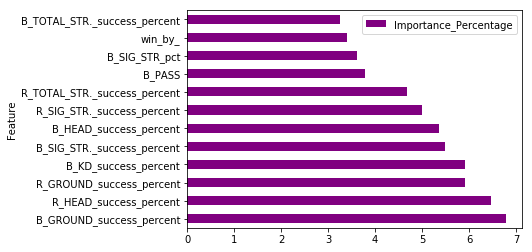

In [37]:
feat_importance.head(12).set_index('Feature').plot(kind='barh', color='purple')
plt.show()

## Accuracy check

In [38]:
# Accuracy check

predictions = pd.Series(y_pred)
actual = pd.Series(df_holdout['Result'].values)
df_compare = pd.DataFrame({
    'actual': actual,
    'predicted': predictions
})

df_compare[df_compare['actual'] == df_compare['predicted']].shape[0] / len(df_compare)

0.74

# Model selection via experimentation

### Testing different algorithms/models

In [39]:
%%time

# Testing different algorithms/models
use_cross_val = True
dict_model_accuracy = dict()
algorithms = ['knn', 'rfc', 'logistic_regression', 'svm', 'naive_bayes']
for algorithm in algorithms:
    if algorithm == 'knn':
        classifier = KNeighborsClassifier(n_neighbors=55, metric='minkowski', p=2)
    elif algorithm == 'rfc':
        classifier = RandomForestClassifier(n_estimators=30, criterion='gini', max_depth=30)
    elif algorithm == 'logistic_regression':
        classifier = LogisticRegression(solver='sag')
    elif algorithm == 'svm':
        classifier = svm.SVC(kernel='rbf')
    elif algorithm == 'naive_bayes':
        classifier = naive_bayes.GaussianNB()

    model = classifier.fit(X_train, y_train)
    
    if use_cross_val:
        # Evaluate with k-fold cross-validation
        scores = cross_val_score(estimator=model, X=X, y=y, cv=20, scoring='accuracy')
        dict_model_accuracy[algorithm] = scores.mean()
    else:        
        # Evaluate with just the model
        y_pred = model.predict(X_test)
        # cm = confusion_matrix(y_test, y_pred)
        model_accuracy = accuracy_score(y_true=y_test, y_pred=y_pred, normalize=True) * 100
        model_accuracy = round(model_accuracy, 2)
        dict_model_accuracy[algorithm] = model_accuracy
#
rename_dict = {
    'index': 'algorithm',
    0: 'accuracy_percentage'
}
df_accuracies = pd.DataFrame(dict_model_accuracy, index=[0]).T.reset_index().rename(mapper=rename_dict, axis=1)
df_accuracies = df_accuracies.sort_values(by='accuracy_percentage', ascending=False).reset_index(drop=True)

D:\Anaconda\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\An

D:\Anaconda\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
D:\Anaconda\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
D:\Anaconda\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
D:\Anaconda\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'aut

Wall time: 55.8 s


In [40]:
df_accuracies

,algorithm,accuracy_percentage
0,rfc,0.849408
1,logistic_regression,0.836822
2,naive_bayes,0.814200
3,knn,0.808485
4,svm,0.690629


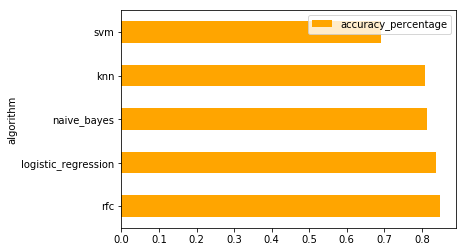

In [41]:
df_accuracies.set_index('algorithm').plot(kind='barh', color='orange')
plt.show()

In [42]:
def save_to_csv(df, filename):
    df.to_csv("{}.csv".format(filename), index=False)
    return '{} saved as CSV'.format(filename)

In [43]:
save_to_csv(df=df_examples, filename='df_examples')

'df_examples saved as CSV'

In [44]:
save_to_csv(df=df_holdout, filename='df_holdout')

'df_holdout saved as CSV'